# Sragvi Tirumala
## 2 May, 2018
## Intro to Data Science
## Rash Classification

This code is intended to extract texture related features from skin rash images. These features will be fed into supervised classification frameworks such as a neural net and a binary tree/random forest. These methods will then be fed into an ensemble learning method with the results from these as well as a Convolutional Neural Net.

# FEATURE EXTRACTION FRAMEWORK

In [11]:
# FIRST, WE PLACE ALL OF OUR IMAGES OF A GIVEN DISEASE INTO AN IMAGE LIST
%matplotlib inline
import numpy as np
import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import skimage
from skimage import color

from skimage.feature import greycomatrix, greycoprops
from skimage.color import rgb2gray
from scipy.misc import imread
import pandas as pd

#Image matrices for each disease
AtoList=[]; PitList=[]; ConList=[]; MelList=[]; MimList = []; PsoList=[]; RinList=[];

for filename in glob.glob('C:/Users/Asus/Documents/Grad School/Intro to Data Science/Project/Final_Images/Final_Images/Atopic Dermatitis/*.jpg'):
    im = mpimg.imread(filename)
    AtoList.append(im)
    
for filename in glob.glob('C:/Users/Asus/Documents/Grad School/Intro to Data Science/Project/Final_Images/Final_Images/Christmas Rash/*.jpg'):
    im = mpimg.imread(filename)
    PitList.append(im)
    
for filename in glob.glob('C:/Users/Asus/Documents/Grad School/Intro to Data Science/Project/Final_Images/Final_Images/Contact Dermatitis/*.jpg'):
    im = mpimg.imread(filename)
    ConList.append(im)
    
for filename in glob.glob('C:/Users/Asus/Documents/Grad School/Intro to Data Science/Project/Final_Images/Final_Images/Malignant Melanoma/*.jpg'):
    im = mpimg.imread(filename)
    MelList.append(im)    
    
for filename in glob.glob('C:/Users/Asus/Documents/Grad School/Intro to Data Science/Project/Final_Images/Final_Images/melanoma mimic/*.jpg'):
    im = mpimg.imread(filename)
    MimList.append(im)  

for filename in glob.glob('C:/Users/Asus/Documents/Grad School/Intro to Data Science/Project/Final_Images/Final_Images/Psoriasis/*.jpg'):
    im = mpimg.imread(filename)
    PsoList.append(im)
    
for filename in glob.glob('C:/Users/Asus/Documents/Grad School/Intro to Data Science/Project/Final_Images/Final_Images/Ringworm/*.jpg'):
    im = mpimg.imread(filename)
    RinList.append(im)    

DisImList = [AtoList, PitList, ConList, MelList, MimList, PsoList, RinList]
    
nfiles = len(RinList)
print(nfiles)

86


In [ ]:
#Train test split
Xtrain = pd.read_csv(r'C:\Users\Asus\Documents\Grad School\Intro to Data Science\Project\traintestsets\Xtrain_data.csv')
ytrain = pd.read_csv(r'C:\Users\Asus\Documents\Grad School\Intro to Data Science\Project\traintestsets\ytrain.csv')
Xtest = pd.read_csv(r'C:\Users\Asus\Documents\Grad School\Intro to Data Science\Project\traintestsets\Xtest_data.csv')
ytest = pd.read_csv(r'C:\Users\Asus\Documents\Grad School\Intro to Data Science\Project\traintestsets\ytest.csv')

base_dir = r'C:\Users\Asus\Documents\Grad School\Intro to Data Science\Project\NewFinalImages'
Xtrain_feat = []
Xtest_feat = []
Xtrain_list=[]
Xtest_list=[]

for i in range(0,len(Xtrain)):
    disease = Xtrain.loc[i][2].split('\\')[-2]
    filename = Xtrain.loc[i][2].split('\\')[-1]
    fullpath = os.path.join(base_dir,disease,filename)
    Xtrain_list.append(fullpath)
    im_temp = mpimg.imread(Xtrain_list[i])
    Xtrain_feat.append(im_temp) 
    

for i in range(0,len(Xtest)):
    disease = Xtest.loc[i][2].split('\\')[-2]
    filename = Xtest.loc[i][2].split('\\')[-1]
    fullpath = os.path.join(base_dir,disease,filename)
    Xtest_list.append(fullpath) 
    im_temp = mpimg.imread(Xtrain_list[i])
    Xtest_feat.append(im_temp)   

In [27]:
#Store Gray-level co-occurrence matrix stats
contrast = []
energy = []
TexStats = pd.DataFrame()

#disease number
disnum = int(1)

#iterate across all diseases
for dis in DisImList:
    
    for img in dis:

        img2 = np.uint8(rgb2gray(img)*255)

        #compute gray-level co-occurrence matrix
        glcm = greycomatrix(img2, [1,5], [0,45,90], 256, symmetric=True)

        #ignore 0,0 adjacencies
        glcm[0,0,:,:] = 0

        contrast = (greycoprops(glcm, 'contrast')[0, 0])
        energy = (greycoprops(glcm, 'energy')[0, 0])
        TexStats = TexStats.append({'Contrast': contrast, 'Energy': energy, 'Label': disnum},ignore_index = True)
    
#     contrast = []
#     energy = []
    disnum = disnum+1
        
TexStats.shape[0]

    

C:\Users\Asus\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\skimage\feature\texture.py:109: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(image.dtype, np.float):


1082

In [28]:
TexStats.head()

,Contrast,Energy,Label
0,39914280.0,2470.942735,1.0
1,24607048.0,3569.820724,1.0
2,21547288.0,5057.393993,1.0
3,9969736.0,1098.845758,1.0
4,25175954.0,3846.323699,1.0


In [58]:
from sklearn import tree

#extract just x values
features = list(TexStats.columns[:2])

#split into train/test
y = TexStats["Label"]
X = TexStats[features]
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X,y)

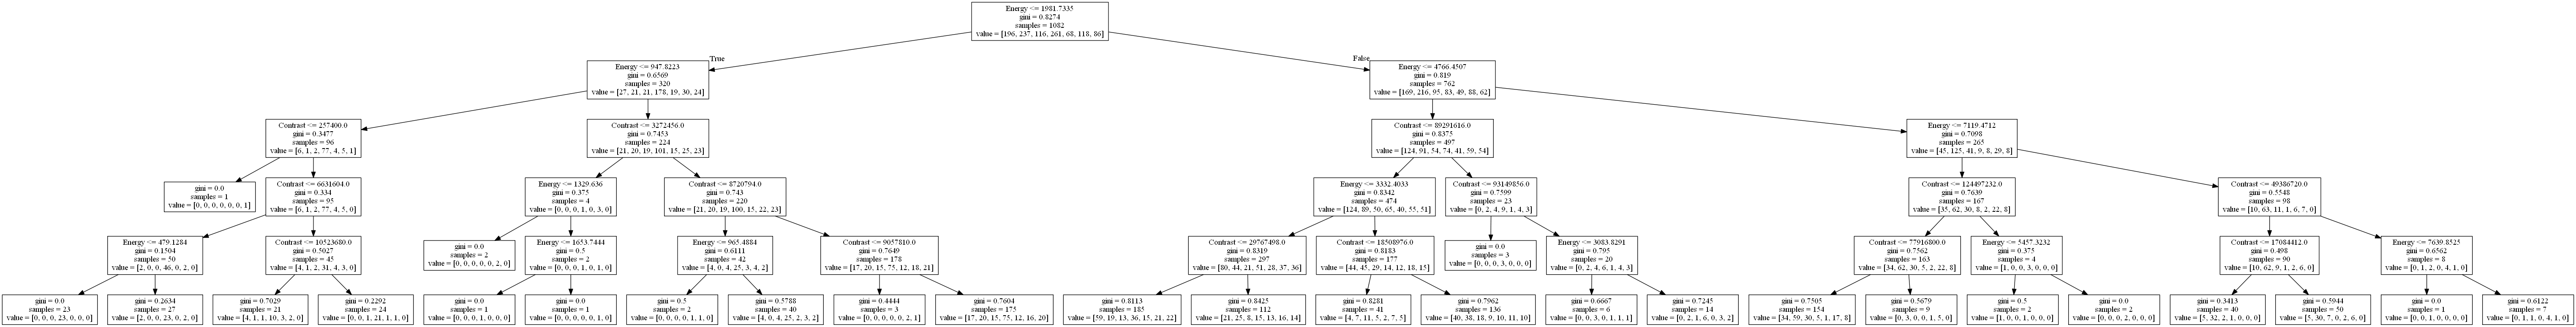

In [59]:
# decision tree
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydotplus

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=features)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

In [60]:
TexStats['Label'].value_counts()

4.0    261
2.0    237
1.0    196
6.0    118
3.0    116
7.0     86
5.0     68
Name: Label, dtype: int64

In [61]:
from sklearn import metrics

def measure_performance(X,y,clf, show_accuracy=True, show_classification_report=True, show_confusion_matrix=True):
    y_pred=clf.predict(X)   
    if show_accuracy:
        print ("Accuracy:{0:.3f}".format(metrics.accuracy_score(y,y_pred)),"\n")

    if show_classification_report:
        print ("Classification report")
        print (metrics.classification_report(y,y_pred),"\n")
        
    if show_confusion_matrix:
        print ("Confusion matrix")
        print (metrics.confusion_matrix(y,y_pred),"\n")
        
measure_performance(X,y,clf, show_classification_report=False, show_confusion_matrix=False)



Accuracy:0.431 



In [62]:
# cross validation
from sklearn.model_selection import cross_val_score

cross_val_score(clf, X, y, cv=10)

array([0.31531532, 0.38181818, 0.3       , 0.27272727, 0.34545455,
       0.35454545, 0.30841121, 0.30188679, 0.42307692, 0.43269231])

In [33]:
#random forest

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X, y)


In [37]:
features = list(TexStats.columns[:2])
np.shape(features)

(2,)

In [40]:
X = TexStats[features]
print(np.shape(X))

(1082, 2)


In [42]:
y = TexStats["Label"]
print(np.shape(y))

(1082,)
